In [1]:
from sklearn.datasets import load_breast_cancer
from sklearn.svm import SVC
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt


In [2]:
cancer = load_breast_cancer()
X = cancer.data[:, :2]   # Using first two features for visualization
y = cancer.target


In [3]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [4]:
svm = SVC(kernel="linear", C=1)
svm.fit(X_train, y_train)


,C,1
,kernel,'linear'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


In [5]:
y_pred = svm.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Accuracy: 0.9035087719298246
              precision    recall  f1-score   support

           0       0.90      0.84      0.87        43
           1       0.91      0.94      0.92        71

    accuracy                           0.90       114
   macro avg       0.90      0.89      0.90       114
weighted avg       0.90      0.90      0.90       114



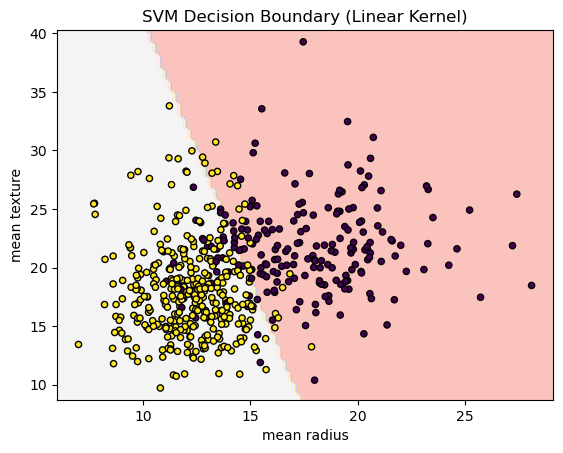

In [6]:
DecisionBoundaryDisplay.from_estimator(
    svm,
    X,
    response_method="predict",
    cmap="Pastel1",
    alpha=0.8,
    xlabel=cancer.feature_names[0],
    ylabel=cancer.feature_names[1],
)

plt.scatter(X[:, 0], X[:, 1], c=y, s=20, edgecolors="k")
plt.title("SVM Decision Boundary (Linear Kernel)")
plt.show()
